In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("survey_results_public.csv")
pd.set_option('display.max_row', 500)
pd.set_option('display.float_format', '{:.2f}'.format)
'''

df = df.drop(columns=['ResponseId','CodingActivities','Employment','OrgSize','TechList','PurchaseInfluence','BuyNewTool','PlatformHaveWorkedWith','PlatformWantToWorkWith','Q120','DatabaseHaveWorkedWith','DatabaseWantToWorkWith','WebframeHaveWorkedWith','WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith','NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'SOAI', 'AISelect',
       'AISent', 'AIAcc', 'AIBen'],axis=1)
'''
''' Não uteis
    CodingActivities
    Employment
    OrgSize
    TechList
    PurchaseInfluence
    BuyNewTool
    Currency
'''
''' Kinda
    LearnCode
    LearnCodeOnline
    LearnCodeCoursesCert
    YearsCode
    DevType
    LanguageHaveWorkedWith
    AISearchHaveWorkedWith
    WorkExp
    TimeAnswering
'''
''' Uteis
    EdLevel
    RemoteWork
    Country
    ConvertedCompYearly
'''
df


In [105]:
test = df.LanguageWantToWorkWith.dropna()
array = []
for val in test:
    temp = val.split(";")
    for item in temp:
        array.append(item)
dfLTWW = pd.DataFrame(array)
dfLTWW.value_counts(normalize=True).round(4)*100

test2 = df.LanguageHaveWorkedWith.dropna()
array2 = []
for val in test2:
    temp = val.split(";")
    for item in temp:
        array2.append(item)



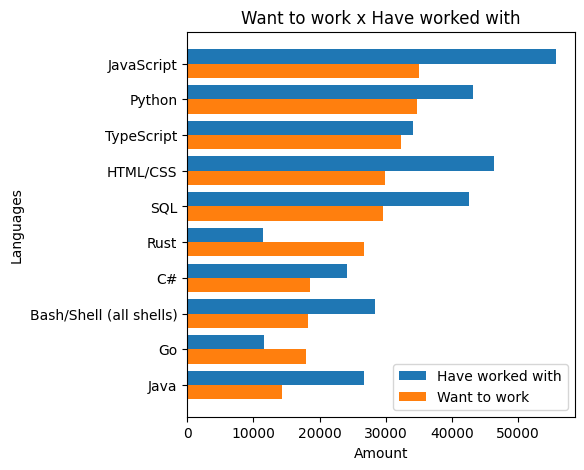

In [106]:
dffinal = pd.DataFrame(pd.DataFrame(array).value_counts())
dfmerge = pd.DataFrame(pd.DataFrame(array2).value_counts())
dfmerge.reset_index(inplace=True)                       
dffinal.reset_index(inplace=True)
dffinal = dffinal.rename(columns = {0:'Items'})
dfmerge = dfmerge.rename(columns = {0:'Items'})

result = pd.merge(dffinal, dfmerge, on='Items', how='inner')
result = result.head(10)

X = result.Items
Ygirls = result.count_x	
Zboys = result.count_y

X_axis = np.arange(len(X))[::-1]

plt.figure(figsize=[5,5])

plt.barh(X_axis + 0.2, Zboys, 0.4, label = 'Have worked with') 
plt.barh(X_axis - 0.2, Ygirls, 0.4, label = 'Want to work') 


plt.yticks(X_axis, X) 
plt.xlabel("Amount") 
plt.ylabel("Languages") 
plt.title("Want to work x Have worked with") 
plt.legend()
plt.show()

In [107]:
ConvertedCompYearly = df[['Country','ConvertedCompYearly']].dropna()
ConvertedCompYearly = ConvertedCompYearly[(ConvertedCompYearly['ConvertedCompYearly'] > 13000.00) & (ConvertedCompYearly['ConvertedCompYearly'] < 1000000.00)]

ConvertedCompYearly = ConvertedCompYearly.groupby("Country")
ConvertedCompYearly = ConvertedCompYearly.mean()
ConvertedCompYearly = ConvertedCompYearly.sort_values(by='ConvertedCompYearly')[::-1]
ConvertedCompYearly.head()

,ConvertedCompYearly
Country,
United States of America,166719.33
Switzerland,135299.99
Kuwait,133320.80
Dominica,132857.00
Swaziland,132796.67


In [108]:
RemoteWork = df[['RemoteWork', 'ConvertedCompYearly']].dropna()
RemoteWork = RemoteWork[(RemoteWork['ConvertedCompYearly'] > 1000.00) & (RemoteWork['ConvertedCompYearly'] < 1000000.00)]
RemoteWork.replace('Hybrid (some remote, some in-person)','Hybrid',inplace=True)
RemoteWork = RemoteWork.groupby("RemoteWork")
RemoteWork = RemoteWork.mean()
RemoteWork = RemoteWork.sort_values(by='ConvertedCompYearly')[::-1]
RemoteWork

,ConvertedCompYearly
RemoteWork,
Remote,105442.33
Hybrid,90452.03
In-person,68505.50


In [109]:
EdLevel = df[['EdLevel',"ConvertedCompYearly"]].dropna()
EdLevel = EdLevel[(EdLevel['ConvertedCompYearly'] > 1000.00) & (EdLevel['ConvertedCompYearly'] < 1000000.00)]
EdLevel = EdLevel.groupby('EdLevel')
EdLevel = EdLevel.mean()
EdLevel = EdLevel.sort_values(by='ConvertedCompYearly')[::-1]
EdLevel

,ConvertedCompYearly
EdLevel,
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",104634.58
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",97412.67
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",94908.69
Some college/university study without earning a degree,87939.44
Primary/elementary school,87201.00
"Associate degree (A.A., A.S., etc.)",87060.63
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",71509.27
Something else,68410.27


In [110]:
DevType = df[['DevType','ConvertedCompYearly']].dropna()
DevType = DevType[(DevType['ConvertedCompYearly'] > 1000.00) & (DevType['ConvertedCompYearly'] < 1000000.00)]
DevType = DevType.groupby('DevType')
DevType = DevType.mean()
DevType = DevType.sort_values(by='ConvertedCompYearly')[::-1]
DevType.drop('Other (please specify):',inplace=True)
DevType

,ConvertedCompYearly
DevType,
"Senior Executive (C-Suite, VP, etc.)",152815.17
Engineering manager,139279.67
Developer Experience,137462.70
"Engineer, site reliability",136991.31
Cloud infrastructure engineer,128499.06
Marketing or sales professional,128233.05
Developer Advocate,127967.26
Security professional,127136.11
Product manager,124339.57


C:\Users\Leo\AppData\Local\Temp\ipykernel_15060\1444840282.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_per_age = counts.groupby('Age').apply(lambda group: group.nlargest(3, 'Count')).reset_index(drop=True)


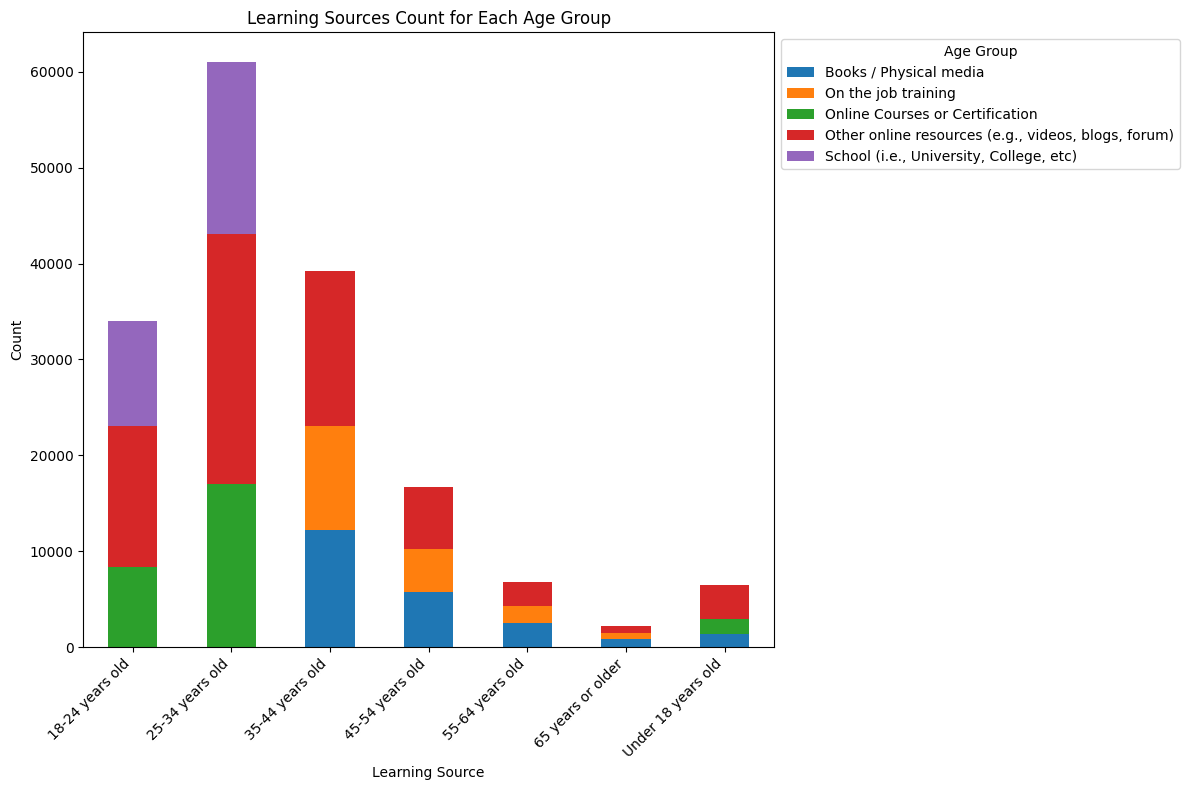

In [200]:
LearnCode = df[['Age','LearnCode']].dropna()
LearnCode = LearnCode[LearnCode['Age'] != 'Prefer not to say']

array = []

for num, val in enumerate(LearnCode['LearnCode']):
    split = val.split(';')
    for item in split:
        array.append([LearnCode['Age'].iloc[num], item])
    

LearnCode = pd.DataFrame(array,columns=['Age', 'Learning Source'])

counts = LearnCode.groupby(['Age', 'Learning Source']).size().reset_index(name='Count')
top3_per_age = counts.groupby('Age').apply(lambda group: group.nlargest(3, 'Count')).reset_index(drop=True)
top3_per_age

pivot_table = top3_per_age.pivot(index='Age', columns='Learning Source', values='Count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each learning source as a stacked bar
pivot_table.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Learning Source')
ax.set_ylabel('Count')
ax.set_title('Learning Sources Count for Each Age Group')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()